In [1]:
import findspark
findspark.init()
import pyspark as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col

In [2]:
# 1.
# Creation of spark session for task 1 PySpark Analysis of Nuclear Plants dataset
spark = SparkSession.builder.appName('Task_1_Big_Data').getOrCreate()
df = spark.read.csv("nuclear_plants_small_dataset.csv", inferSchema=True, header=True)
df.limit(20).toPandas()

,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
0,Normal,4.5044,0.7443,6.3400,1.9052,29.5315,0.8647,2.2044,6.0480,14.4659,21.6480,15.3429,1.2186
1,Normal,4.4284,0.9073,5.6433,1.6232,27.5032,1.4704,1.9929,5.9856,20.8356,0.0646,14.8813,7.3483
2,Normal,4.5291,1.0199,6.1130,1.0565,26.4271,1.9247,1.9420,6.7162,5.3358,11.0779,25.0914,9.2408
3,Normal,5.1727,1.0007,7.8589,0.2765,25.1576,2.6090,2.9234,6.7485,1.9017,1.8463,28.6640,4.0157
4,Normal,5.2258,0.6125,7.9504,0.1547,24.0765,3.2113,4.4563,5.8411,0.5077,9.3700,34.8122,13.4966
5,Normal,4.8834,0.5786,5.6021,0.5942,21.0365,2.6275,4.3996,5.3487,3.6465,9.3793,36.2431,11.1240
6,Normal,5.7422,0.8862,5.1013,0.9402,15.5171,2.9200,2.7061,5.0366,9.1854,9.1116,27.3162,2.8526
7,Normal,6.5076,0.5438,7.1530,0.6711,11.1481,4.2967,3.5731,4.6123,14.7705,8.0038,24.9714,2.1417
8,Normal,5.6250,0.0403,7.7087,0.3214,8.7975,2.3293,4.7880,5.2030,4.3388,2.4187,20.9187,2.1233
9,Normal,4.9942,0.4092,6.2604,0.6931,6.1890,0.1537,2.4934,5.6573,9.8132,13.3581,23.5036,0.7478


In [5]:
# Check for nulls, imported functions from sql.functions | count, when, isnan, col
# Code modified from https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()

,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
from pyspark.sql.functions import mean, max, min
# 2.
# Mean, Max, Min, Median summaries printed for each group
# https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html
# Power Range Sensor 1 summary
# Specify the feature column
feature_column1 = 'Power_range_sensor_1'

# Code modified from https://stackoverflow.com/questions/55265397/best-way-to-filter-to-a-specific-row-in-pyspark-dataframe
# Calculate summary statistics for Normal group
PRS_1_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column1)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
# Print normal group results
print("Summary for 'Normal' Status:")
print(PRS_1_Normal_Sum)

# Calculate summary statistics for Abnormal group
PRS_1_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column1)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
# Print abonormal group results
print("\nSummary for 'Abnormal' Status:")
print(PRS_1_Abnormal_Sum)

Summary for 'Normal' Status:
  summary Power_range_sensor_1
0    mean    5.602452811244976
1     max              12.1298
2     min               0.0851
3     50%               5.1727

Summary for 'Abnormal' Status:
  summary Power_range_sensor_1
0    mean    4.396694975903612
1     max            10.923078
2     min               0.0082
3     50%               4.5053


In [93]:
# Power Range Sensor 2 summary
feature_column2 = 'Power_range_sensor_2'

PRS_2_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column2)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("Summary for 'Normal' Status:")
print(PRS_2_Normal_Sum)

PRS_2_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column2)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(PRS_2_Abnormal_Sum)

Summary for 'Normal' Status:
  summary Power_range_sensor_2
0    mean    6.844503413654616
1     max              11.9284
2     min               0.0403
3     50%               6.6998

Summary for 'Abnormal' Status:
  summary Power_range_sensor_2
0    mean    5.914042891566265
1     max              10.1541
2     min               0.3891
3     50%             5.929872


In [27]:
# Power Range Sensor 3 summary
feature_column3 = 'Power_range_sensor_3 '

PRS_3_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column3)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(PRS_3_Normal_Sum)

PRS_3_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column3)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(PRS_3_Abnormal_Sum)


Summary for 'Normal' Status:
  summary Power_range_sensor_3 
0    mean     9.292054016064245
1     max               14.0982
2     min                4.3826
3     50%                9.2624

Summary for 'Abnormal' Status:
  summary Power_range_sensor_3 
0    mean     9.164170212851408
1     max               15.7599
2     min              2.583966
3     50%                9.4666


In [12]:
# Power Range Sensor 4 summary
feature_column4 = 'Power_range_sensor_4'

PRS_4_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column4)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(PRS_4_Normal_Sum)

PRS_4_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column4)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(PRS_4_Abnormal_Sum)


Summary for 'Normal' Status:
  summary Power_range_sensor_4
0    mean    8.701398192771098
1     max              16.3568
2     min               0.1547
3     50%               9.2404

Summary for 'Abnormal' Status:
  summary Power_range_sensor_4
0    mean     6.00914597991968
1     max            17.235858
2     min               0.0623
3     50%               5.3952


In [15]:
# Pressure Sensor 1 summary
feature_column5 = 'Pressure _sensor_1'

PS_1_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column5)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(PS_1_Normal_Sum)

PS_1_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column5)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(PS_1_Abnormal_Sum)


Summary for 'Normal' Status:
  summary  Pressure _sensor_1
0    mean  13.797525502008051
1     max             56.8562
2     min              0.0248
3     50%             10.6274

Summary for 'Abnormal' Status:
  summary  Pressure _sensor_1
0    mean  14.600728132530124
1     max             67.9794
2     min            0.131478
3     50%             12.5912


In [16]:
# Pressure Sensor 2 summary
feature_column6 = 'Pressure _sensor_2'

PS_2_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column6)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(PS_2_Normal_Sum)

PS_2_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column6)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(PS_2_Abnormal_Sum)


Summary for 'Normal' Status:
  summary  Pressure _sensor_2
0    mean  3.4156463855421695
1     max              9.2212
2     min              0.0104
3     50%               3.113

Summary for 'Abnormal' Status:
  summary  Pressure _sensor_2
0    mean  2.7402695381526083
1     max           10.242738
2     min            0.008262
3     50%            2.380578


In [17]:
# Pressure Sensor 3 summary
feature_column7 = 'Pressure _sensor_3'

PS_3_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column7)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(PS_3_Normal_Sum)

PS_3_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column7)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(PS_3_Abnormal_Sum)


Summary for 'Normal' Status:
  summary Pressure _sensor_3
0    mean  5.923352610441759
1     max            12.6475
2     min             0.0774
3     50%             5.7394

Summary for 'Abnormal' Status:
  summary  Pressure _sensor_3
0    mean  5.5751150803212814
1     max             11.7724
2     min            0.001224
3     50%            5.743314


In [20]:
# Pressure Sensor 4 summary
feature_column8 = 'Pressure _sensor_4'

PS_4_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column8)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(PS_4_Normal_Sum)

PS_4_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column8)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(PS_4_Abnormal_Sum)


Summary for 'Normal' Status:
  summary Pressure _sensor_4
0    mean  5.586180120481923
1     max            15.1085
2     min             0.0058
3     50%             4.2574

Summary for 'Abnormal' Status:
  summary Pressure _sensor_4
0    mean   4.40782413253012
1     max           16.55562
2     min           0.029478
3     50%             3.3072


In [21]:
# Vibration Sensor 1 summary
feature_column9 = 'Vibration_sensor_1'

VS_1_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column9)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(VS_1_Normal_Sum)

VS_1_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column9)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(VS_1_Abnormal_Sum)


Summary for 'Normal' Status:
  summary Vibration_sensor_1
0    mean  8.441436947791166
1     max            31.4981
2     min             0.0092
3     50%             7.4222

Summary for 'Abnormal' Status:
  summary Vibration_sensor_1
0    mean  7.887688803212859
1     max          36.186438
2     min                0.0
3     50%             6.5175


In [24]:
# Vibration Sensor 2 summary
feature_column10 = 'Vibration_sensor_2'

VS_2_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column10)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(VS_2_Normal_Sum)

VS_2_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column10)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(VS_2_Abnormal_Sum)


Summary for 'Normal' Status:
  summary Vibration_sensor_2
0    mean  9.699615863453822
1     max            34.8676
2     min             0.0277
3     50%             8.6684

Summary for 'Abnormal' Status:
  summary  Vibration_sensor_2
0    mean  10.303569907630527
1     max           34.331466
2     min              0.0185
3     50%              8.9085


In [25]:
# Vibration Sensor 3 summary
feature_column11 = 'Vibration_sensor_3'

VS_3_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column11)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(VS_3_Normal_Sum)

VS_3_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column11)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(VS_3_Abnormal_Sum)


Summary for 'Normal' Status:
  summary  Vibration_sensor_3
0    mean  19.437804417670666
1     max             53.2384
2     min              0.0646
3     50%             16.4414

Summary for 'Abnormal' Status:
  summary Vibration_sensor_3
0    mean  10.93815894779115
1     max          36.911454
2     min           0.131784
3     50%           8.983038


In [26]:
# Vibration Sensor 4 summary
feature_column12 = 'Vibration_sensor_4'

VS_4_Normal_Sum = (
    df.filter(col('Status') == 'Normal')
      .select(feature_column12)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Normal' Status:")
print(VS_4_Normal_Sum)

VS_4_Abnormal_Sum = (
    df.filter(col('Status') == 'Abnormal')
      .select(feature_column12)
      .summary('mean', 'max', 'min', '50%')
      .toPandas()
)
print("\nSummary for 'Abnormal' Status:")
print(VS_4_Abnormal_Sum)


Summary for 'Normal' Status:
  summary  Vibration_sensor_4
0    mean  10.925097590361439
1     max             43.2314
2     min              0.0831
3     50%              9.4347

Summary for 'Abnormal' Status:
  summary Vibration_sensor_4
0    mean    8.9420846746988
1     max            26.4669
2     min             0.0092
3     50%             8.1145


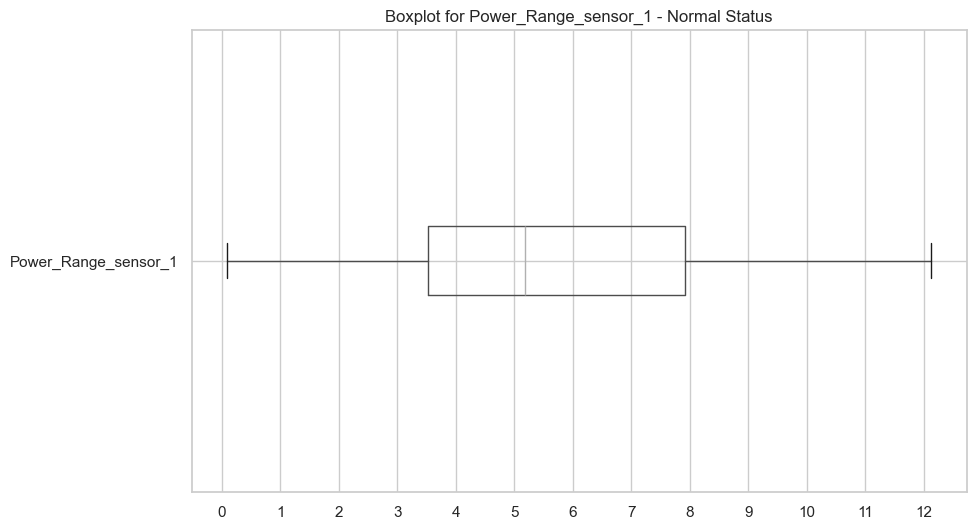

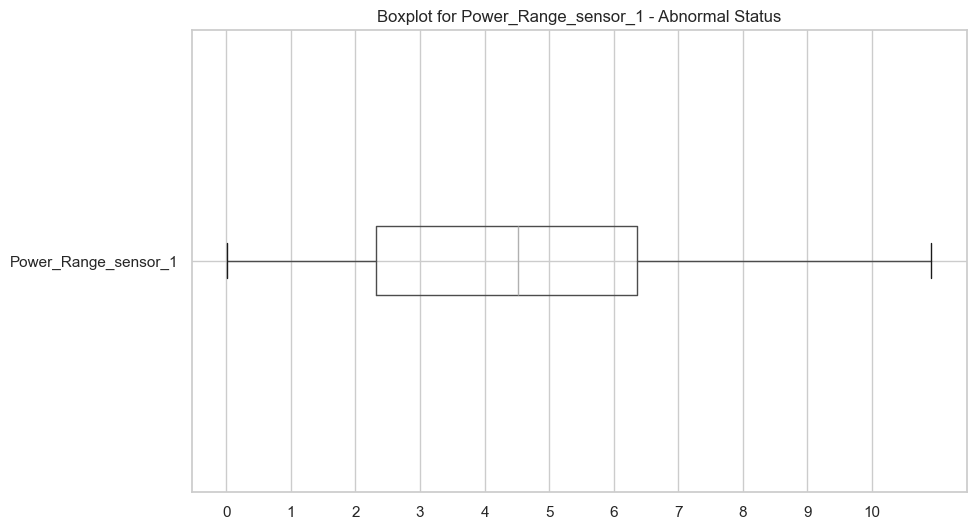

In [59]:
# Power Range Sensor 1 Box Plot

# Select the status column from Power_Range_sensor_1
power_sensor_1_column = df.select('Power_Range_sensor_1', 'Status')

# Select the Normal rows
power_sensor_1_normal = power_sensor_1_column.filter(col('Status') == 'Normal').toPandas()

# Select the Abnormal rows
power_sensor_1_abnormal = power_sensor_1_column.filter(col('Status') == 'Abnormal').toPandas()

# Plot boxplot for the normal group
# Code modified from https://sparkbyexamples.com/pandas/pandas-boxplot-from-dataframe/
plt.figure(figsize=(10, 6))
power_sensor_1_normal.boxplot(column='Power_Range_sensor_1', vert=False)
plt.title('Boxplot for Power_Range_sensor_1 - Normal Status')
# Code modified from https://stackoverflow.com/a/28987863/23133052
# Take range of Power_Range_sensor_1 normal group and add 1 to the x-axis as the x-scale and increment by value of 1
plt.xticks(range(int(power_sensor_1_normal['Power_Range_sensor_1'].min()), int(power_sensor_1_normal['Power_Range_sensor_1'].max()) + 1, 1))
plt.show()

# Plot boxplot for the abnormal group
plt.figure(figsize=(10, 6))
power_sensor_1_abnormal.boxplot(column='Power_Range_sensor_1', vert=False)
plt.title('Boxplot for Power_Range_sensor_1 - Abnormal Status')
plt.xticks(range(int(power_sensor_1_abnormal['Power_Range_sensor_1'].min()), int(power_sensor_1_abnormal['Power_Range_sensor_1'].max()) + 1, 1))
plt.show()

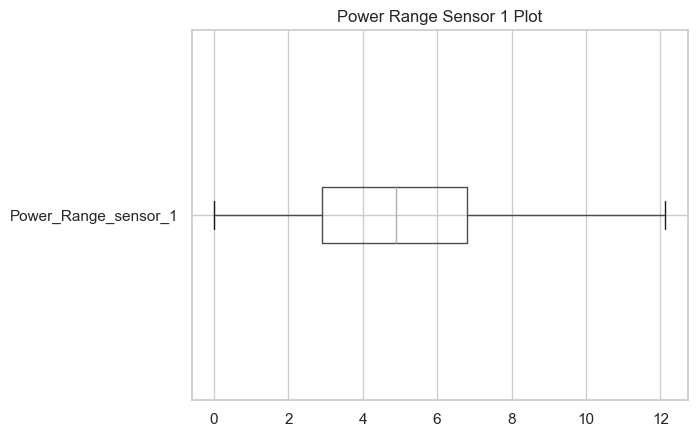

In [62]:
# Power Range Sensor 1 all groups combined boxplot
power_sensor_1_pd = df.select('Power_Range_sensor_1').toPandas()

# Plot the boxplot
power_sensor_1_pd.boxplot(column='Power_Range_sensor_1', vert=False)
plt.title('Power Range Sensor 1 Plot')
plt.show()

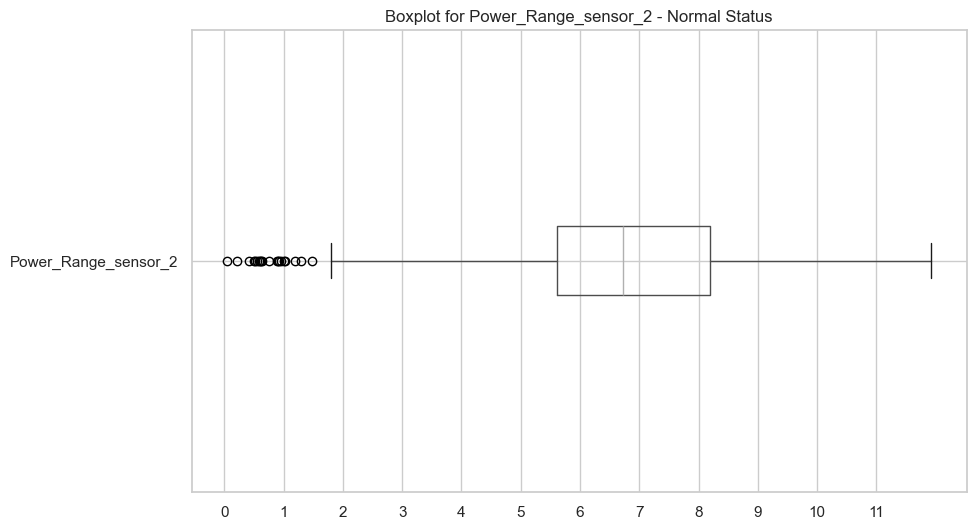

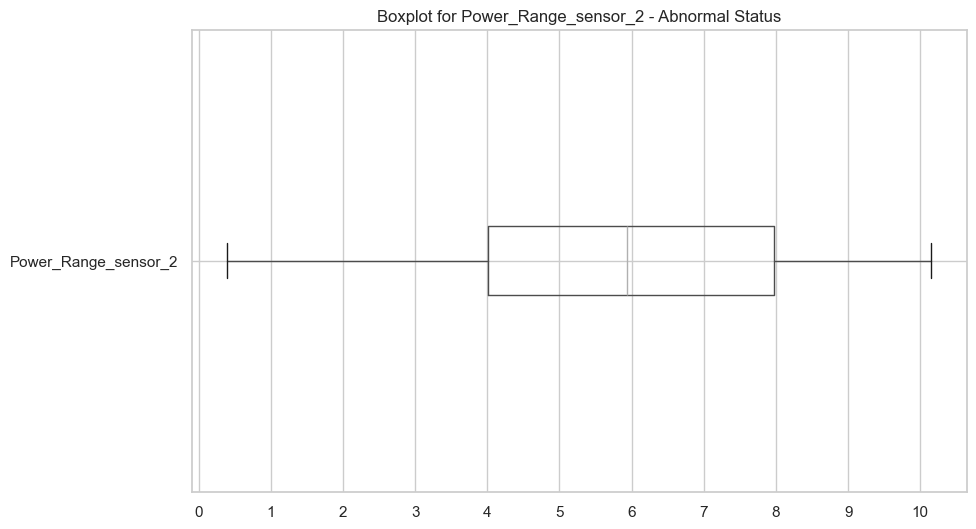

In [94]:
# Power Range Sensor 2 Box Plot

power_sensor_2_column = df.select('Power_Range_sensor_2', 'Status')

power_sensor_2_normal = power_sensor_2_column.filter(col('Status') == 'Normal').toPandas()

power_sensor_2_abnormal = power_sensor_2_column.filter(col('Status') == 'Abnormal').toPandas()

# Normal
plt.figure(figsize=(10, 6))
power_sensor_2_normal.boxplot(column='Power_Range_sensor_2', vert=False)
plt.title('Boxplot for Power_Range_sensor_2 - Normal Status')
plt.xticks(range(int(power_sensor_2_normal['Power_Range_sensor_2'].min()), int(power_sensor_2_normal['Power_Range_sensor_2'].max()) + 1, 1))
plt.show()

# Abnormal
plt.figure(figsize=(10, 6))
power_sensor_2_abnormal.boxplot(column='Power_Range_sensor_2', vert=False)
plt.title('Boxplot for Power_Range_sensor_2 - Abnormal Status')
plt.xticks(range(int(power_sensor_2_abnormal['Power_Range_sensor_2'].min()), int(power_sensor_2_abnormal['Power_Range_sensor_2'].max()) + 1, 1))
plt.show()

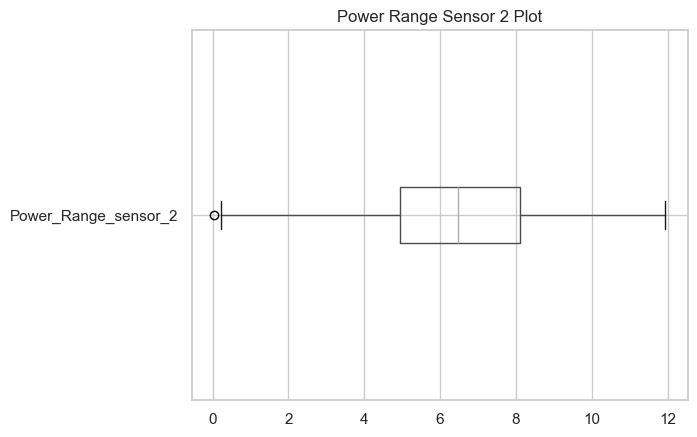

In [63]:
# Power Range Sensor 2 all groups combined boxplot
power_sensor_2_pd = df.select('Power_Range_sensor_2').toPandas()

power_sensor_2_pd.boxplot(column='Power_Range_sensor_2', vert=False)
plt.title('Power Range Sensor 2 Plot')
plt.show()

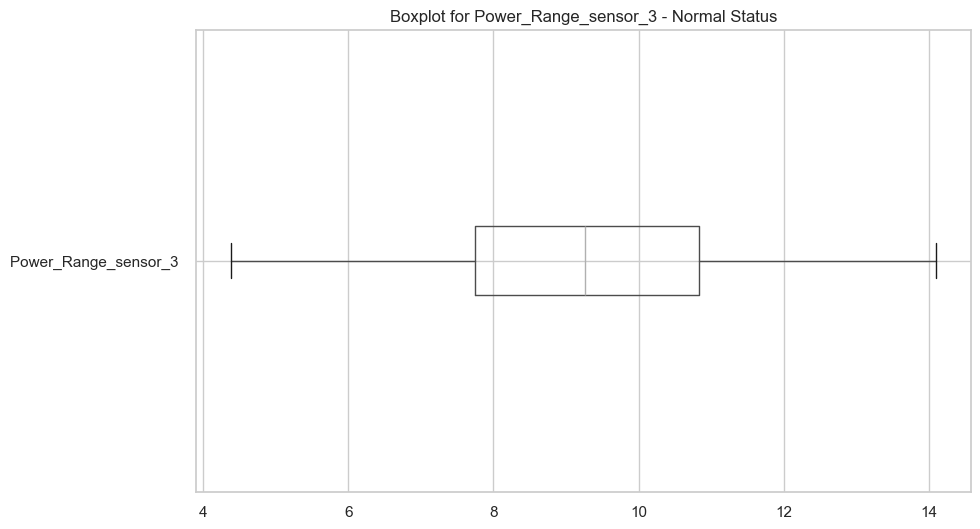

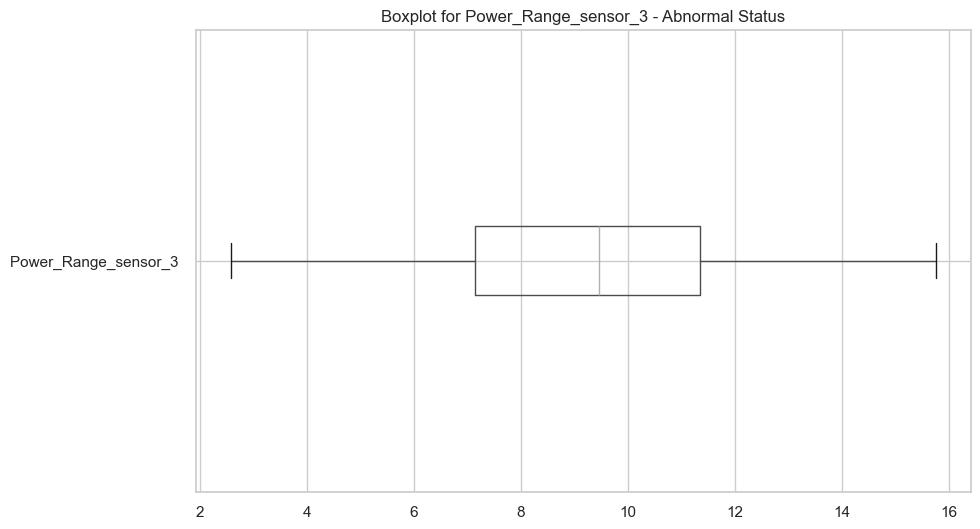

In [45]:
# Power Range Sensor 3 Box Plot

power_sensor_3_column = df.select('Power_Range_sensor_3 ', 'Status')

power_sensor_3_normal = power_sensor_3_column.filter(col('Status') == 'Normal').toPandas()

power_sensor_3_abnormal = power_sensor_3_column.filter(col('Status') == 'Abnormal').toPandas()

# Normal
plt.figure(figsize=(10, 6))
power_sensor_3_normal.boxplot(column='Power_Range_sensor_3 ', vert=False)
plt.title('Boxplot for Power_Range_sensor_3 - Normal Status')
plt.show()

# Abnormal
plt.figure(figsize=(10, 6))
power_sensor_3_abnormal.boxplot(column='Power_Range_sensor_3 ', vert=False)
plt.title('Boxplot for Power_Range_sensor_3 - Abnormal Status')
plt.show()

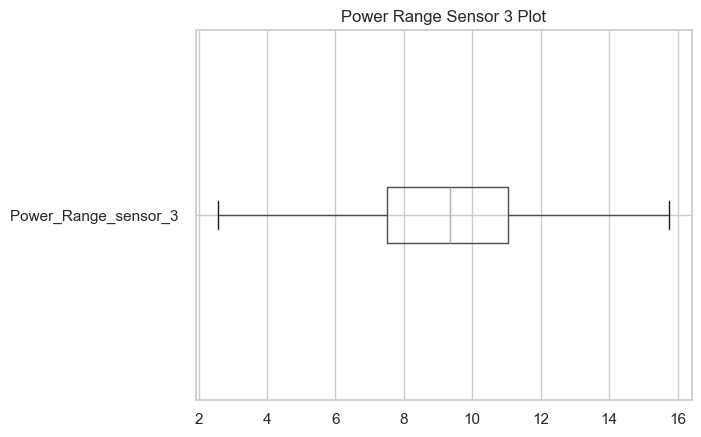

In [64]:
# Power Range Sensor 3 all groups combined boxplot
power_sensor_3_pd = df.select('Power_Range_sensor_3 ').toPandas()

power_sensor_3_pd.boxplot(column='Power_Range_sensor_3 ', vert=False)
plt.title('Power Range Sensor 3 Plot')
plt.show()

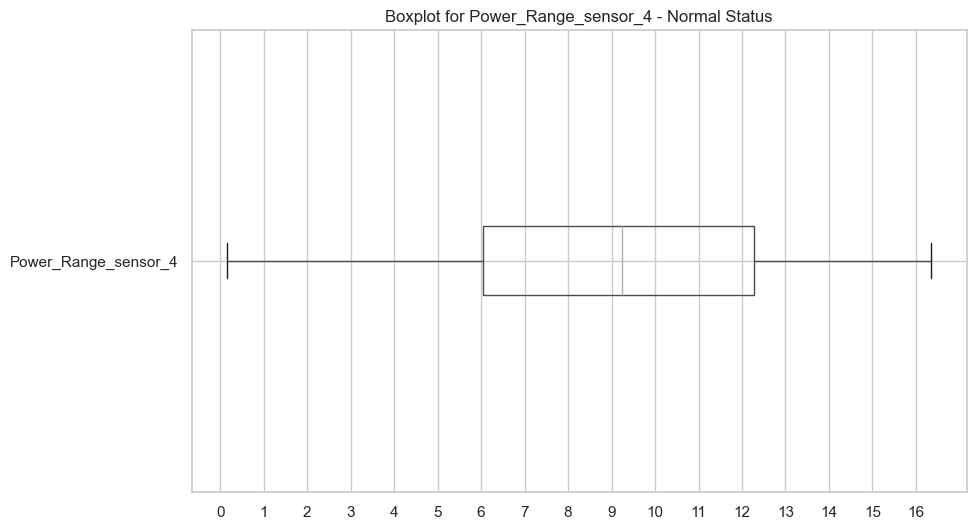

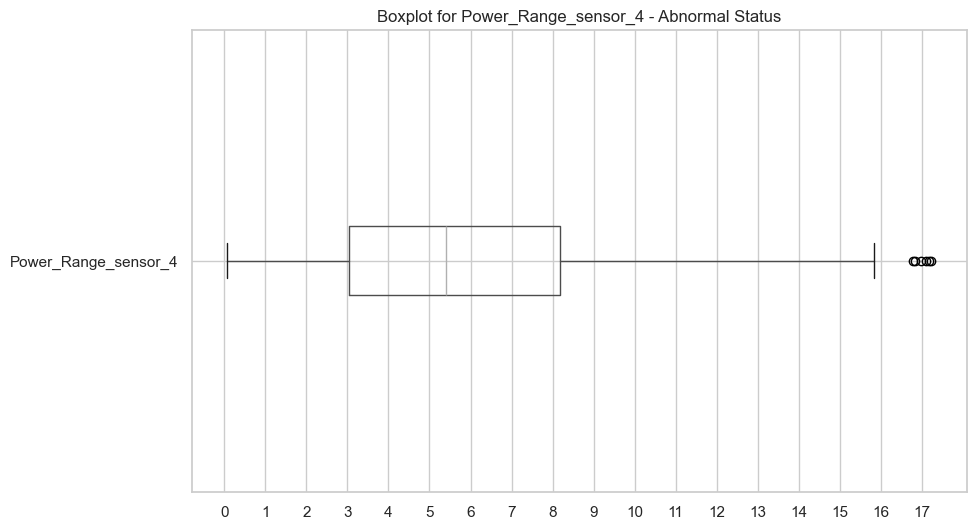

In [61]:
# Power Range Sensor 4 Box Plot

power_sensor_4_column = df.select('Power_Range_sensor_4', 'Status')

power_sensor_4_normal = power_sensor_4_column.filter(col('Status') == 'Normal').toPandas()

power_sensor_4_abnormal = power_sensor_4_column.filter(col('Status') == 'Abnormal').toPandas()

# normal
plt.figure(figsize=(10, 6))
power_sensor_4_normal.boxplot(column='Power_Range_sensor_4', vert=False)
plt.title('Boxplot for Power_Range_sensor_4 - Normal Status')
plt.xticks(range(int(power_sensor_4_normal['Power_Range_sensor_4'].min()), int(power_sensor_4_normal['Power_Range_sensor_4'].max()) + 1, 1))
plt.show()

# abnormal
plt.figure(figsize=(10, 6))
power_sensor_4_abnormal.boxplot(column='Power_Range_sensor_4', vert=False)
plt.title('Boxplot for Power_Range_sensor_4 - Abnormal Status')
plt.xticks(range(int(power_sensor_4_abnormal['Power_Range_sensor_4'].min()), int(power_sensor_4_abnormal['Power_Range_sensor_4'].max()) + 1, 1))
plt.show()

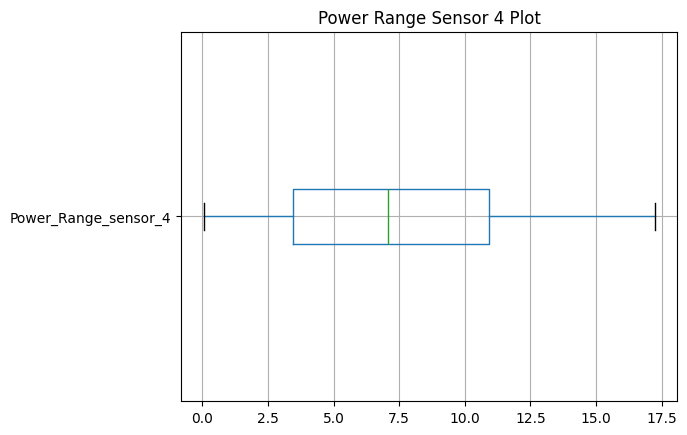

In [46]:
# Power Range Sensor 4 all groups combined Box Plot
power_sensor_4_pd = df.select('Power_Range_sensor_4').toPandas()

power_sensor_4_pd.boxplot(column='Power_Range_sensor_4', vert=False)
plt.title('Power Range Sensor 4 Plot')
plt.show()

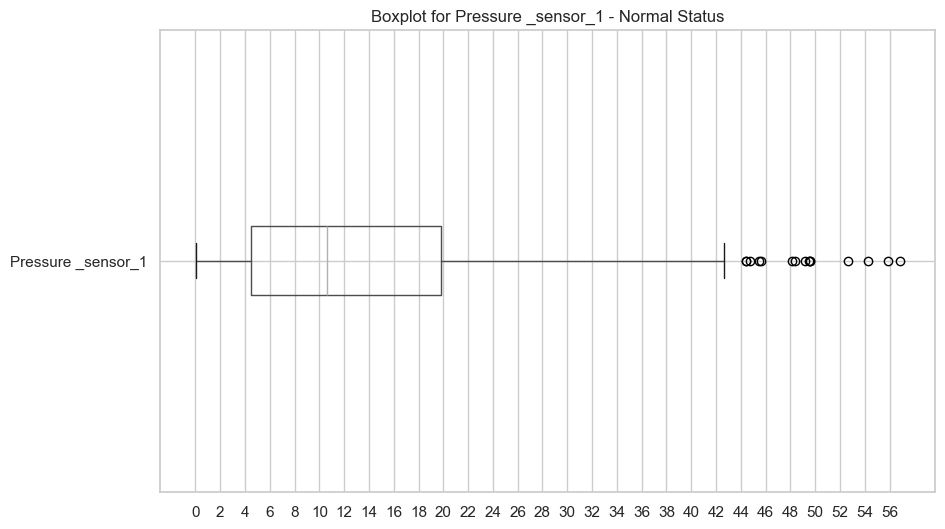

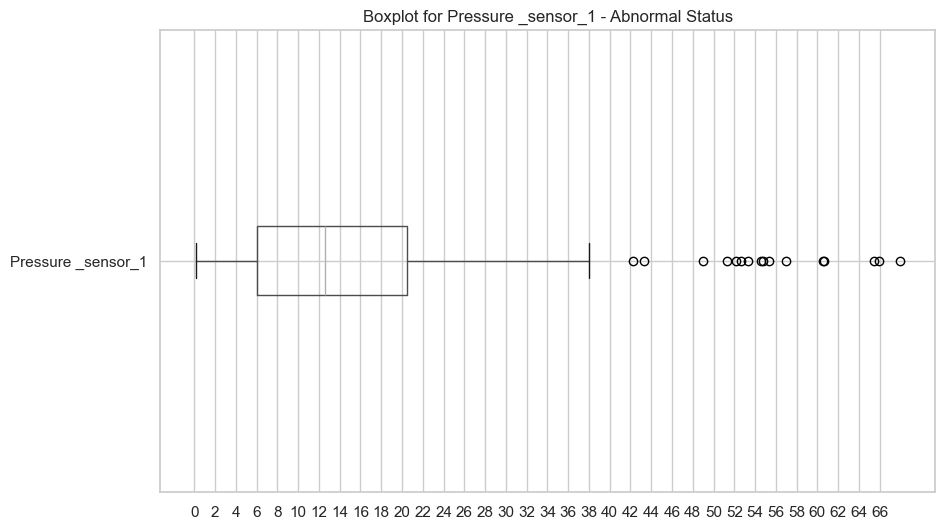

In [95]:
# Pressure Sensor 1 Box Plot

pressure_sensor_1_column = df.select('Pressure _sensor_1', 'Status')

pressure_sensor_1_normal = pressure_sensor_1_column.filter(col('Status') == 'Normal').toPandas()

pressure_sensor_1_abnormal = pressure_sensor_1_column.filter(col('Status') == 'Abnormal').toPandas()

# normal
plt.figure(figsize=(10, 6))
pressure_sensor_1_normal.boxplot(column='Pressure _sensor_1', vert=False)
plt.title('Boxplot for Pressure _sensor_1 - Normal Status')
plt.xticks(range(int(pressure_sensor_1_normal['Pressure _sensor_1'].min()), int(pressure_sensor_1_normal['Pressure _sensor_1'].max()) + 1, 2))
plt.show()

# abnormal
plt.figure(figsize=(10, 6))
pressure_sensor_1_abnormal.boxplot(column='Pressure _sensor_1', vert=False)
plt.title('Boxplot for Pressure _sensor_1 - Abnormal Status')
plt.xticks(range(int(pressure_sensor_1_abnormal['Pressure _sensor_1'].min()), int(pressure_sensor_1_abnormal['Pressure _sensor_1'].max()) + 1, 2))
plt.show()

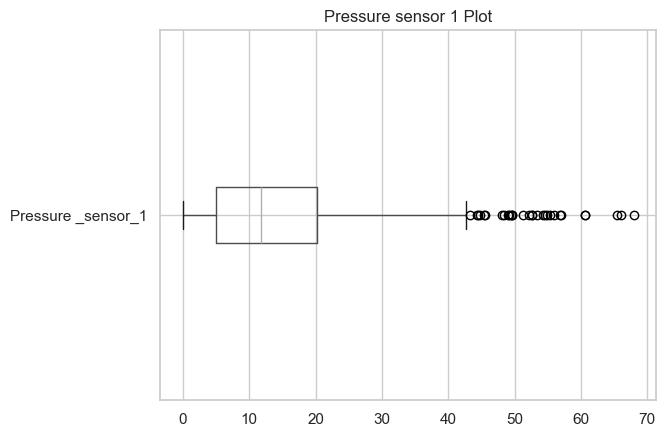

In [75]:
# Pressure Sensor 1 all groups combined Box Plot
pressure_sensor_1_pd = df.select('Pressure _sensor_1').toPandas()

pressure_sensor_1_pd.boxplot(column='Pressure _sensor_1', vert=False)
plt.title('Pressure sensor 1 Plot')
plt.show()

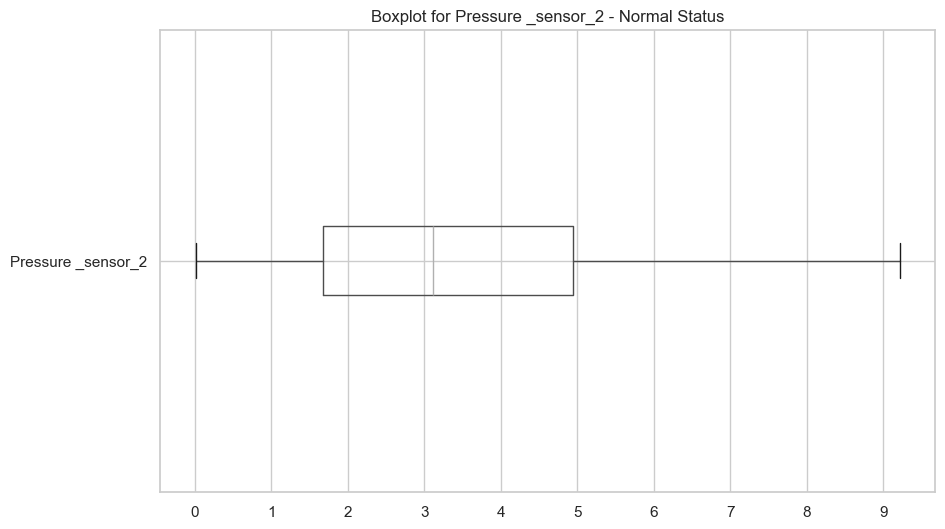

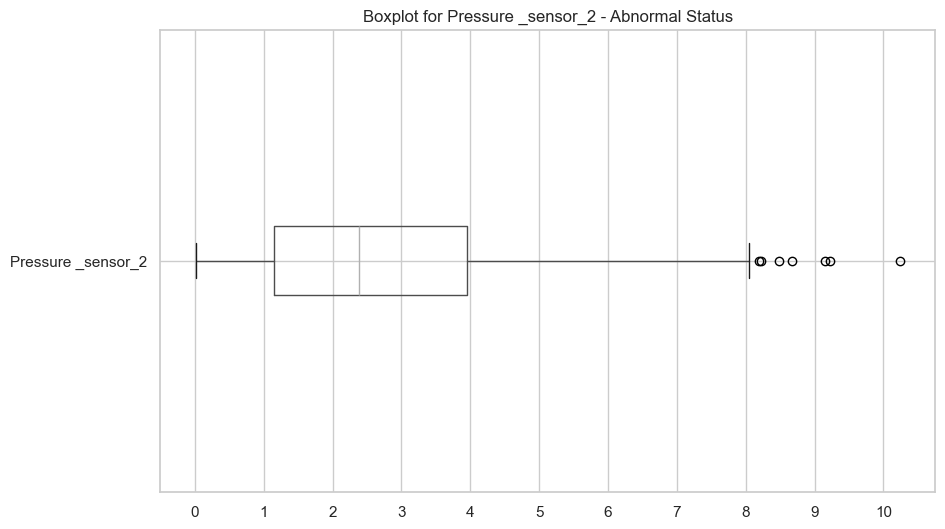

In [70]:
# Pressure Sensor 2 Box Plot

pressure_sensor_2_column = df.select('Pressure _sensor_2', 'Status')

pressure_sensor_2_normal = pressure_sensor_2_column.filter(col('Status') == 'Normal').toPandas()

pressure_sensor_2_abnormal = pressure_sensor_2_column.filter(col('Status') == 'Abnormal').toPandas()

# normal
plt.figure(figsize=(10, 6))
pressure_sensor_2_normal.boxplot(column='Pressure _sensor_2', vert=False)
plt.title('Boxplot for Pressure _sensor_2 - Normal Status')
plt.xticks(range(int(pressure_sensor_2_normal['Pressure _sensor_2'].min()), int(pressure_sensor_2_normal['Pressure _sensor_2'].max()) + 1, 1))
plt.show()

# abnormal
plt.figure(figsize=(10, 6))
pressure_sensor_2_abnormal.boxplot(column='Pressure _sensor_2', vert=False)
plt.title('Boxplot for Pressure _sensor_2 - Abnormal Status')
plt.xticks(range(int(pressure_sensor_2_abnormal['Pressure _sensor_2'].min()), int(pressure_sensor_2_abnormal['Pressure _sensor_2'].max()) + 1, 1))
plt.show()

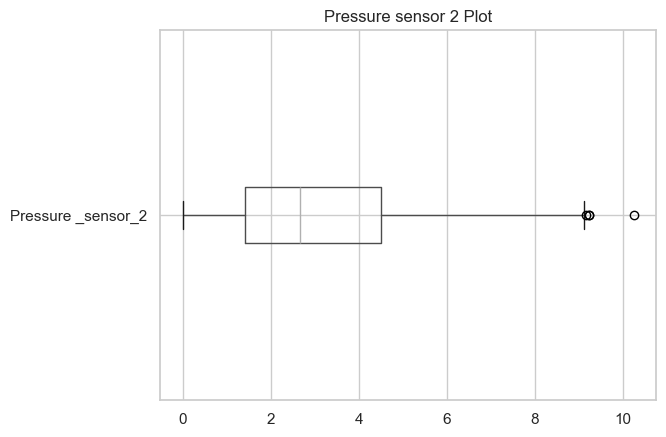

In [76]:
# Pressure Sensor 2 all groups combined Box Plot
pressure_sensor_2_pd = df.select('Pressure _sensor_2').toPandas()

pressure_sensor_2_pd.boxplot(column='Pressure _sensor_2', vert=False)
plt.title('Pressure sensor 2 Plot')
plt.show()

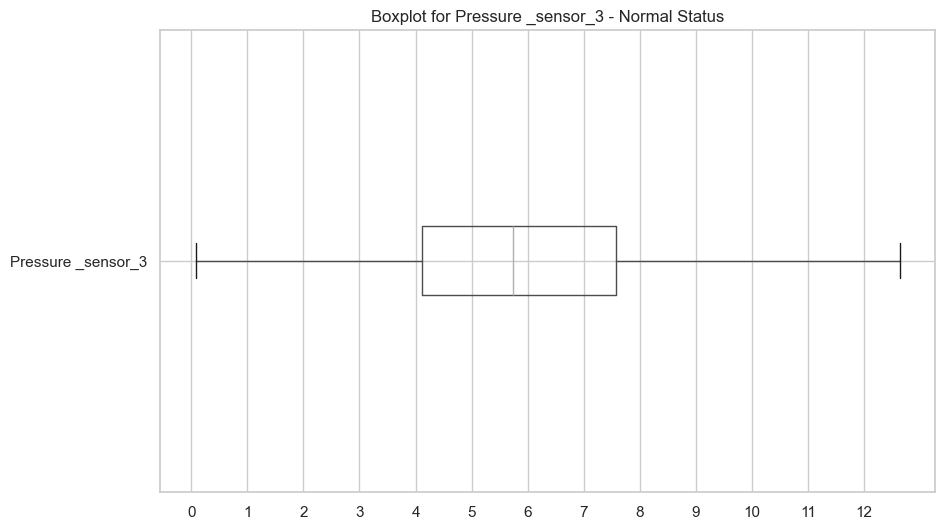

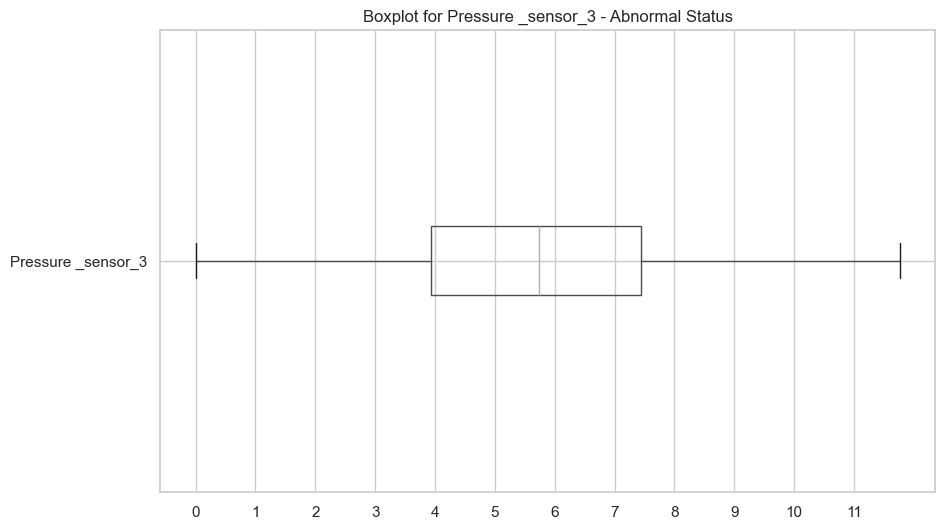

In [71]:
# Pressure Sensor 3 Box Plot

pressure_sensor_3_column = df.select('Pressure _sensor_3', 'Status')

pressure_sensor_3_normal = pressure_sensor_3_column.filter(col('Status') == 'Normal').toPandas()

pressure_sensor_3_abnormal = pressure_sensor_3_column.filter(col('Status') == 'Abnormal').toPandas()

# normal
plt.figure(figsize=(10, 6))
pressure_sensor_3_normal.boxplot(column='Pressure _sensor_3', vert=False)
plt.title('Boxplot for Pressure _sensor_3 - Normal Status')
plt.xticks(range(int(pressure_sensor_3_normal['Pressure _sensor_3'].min()), int(pressure_sensor_3_normal['Pressure _sensor_3'].max()) + 1, 1))
plt.show()

# abnormal
plt.figure(figsize=(10, 6))
pressure_sensor_3_abnormal.boxplot(column='Pressure _sensor_3', vert=False)
plt.title('Boxplot for Pressure _sensor_3 - Abnormal Status')
plt.xticks(range(int(pressure_sensor_3_abnormal['Pressure _sensor_3'].min()), int(pressure_sensor_3_abnormal['Pressure _sensor_3'].max()) + 1, 1))
plt.show()

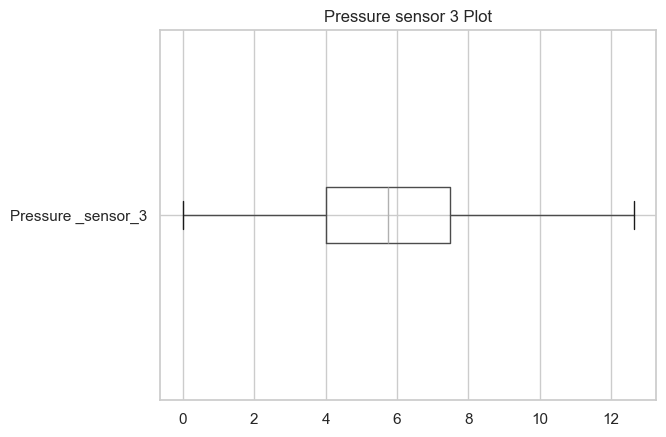

In [77]:
# Pressure Sensor 3 all groups combined Box Plot
pressure_sensor_3_pd = df.select('Pressure _sensor_3').toPandas()

pressure_sensor_3_pd.boxplot(column='Pressure _sensor_3', vert=False)
plt.title('Pressure sensor 3 Plot')
plt.show()

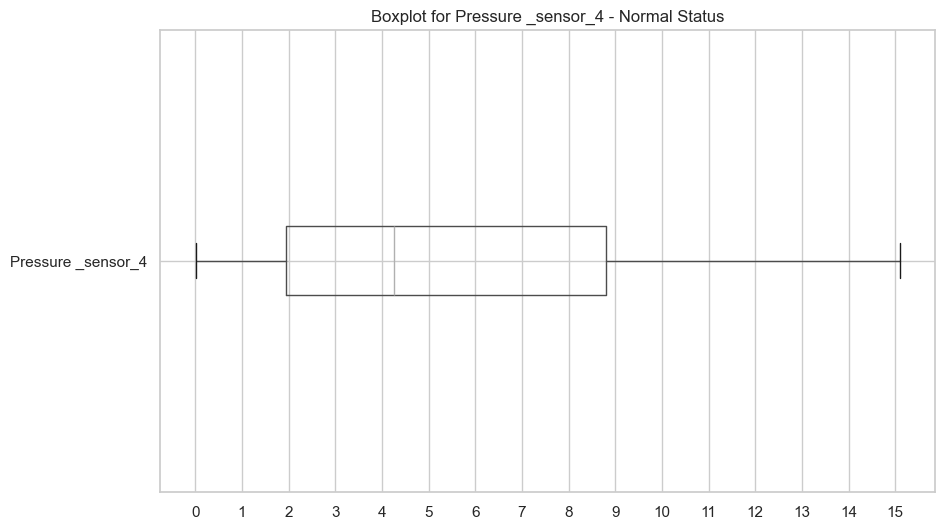

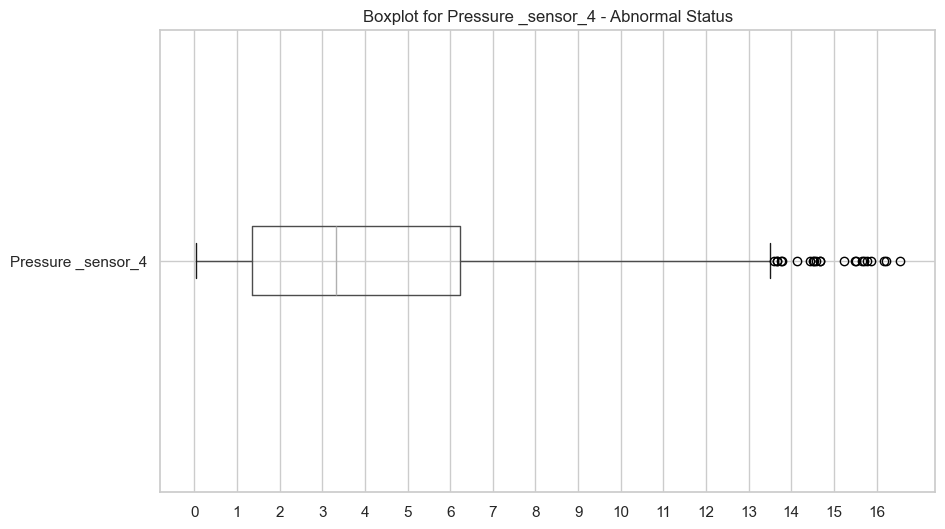

In [73]:
# Pressure Sensor 4 Box Plot

pressure_sensor_4_column = df.select('Pressure _sensor_4', 'Status')

pressure_sensor_4_normal = pressure_sensor_4_column.filter(col('Status') == 'Normal').toPandas()

pressure_sensor_4_abnormal = pressure_sensor_4_column.filter(col('Status') == 'Abnormal').toPandas()

# normal
plt.figure(figsize=(10, 6))
pressure_sensor_4_normal.boxplot(column='Pressure _sensor_4', vert=False)
plt.title('Boxplot for Pressure _sensor_4 - Normal Status')
plt.xticks(range(int(pressure_sensor_4_normal['Pressure _sensor_4'].min()), int(pressure_sensor_4_normal['Pressure _sensor_4'].max()) + 1, 1))
plt.show()

# abnormal
plt.figure(figsize=(10, 6))
pressure_sensor_4_abnormal.boxplot(column='Pressure _sensor_4', vert=False)
plt.title('Boxplot for Pressure _sensor_4 - Abnormal Status')
plt.xticks(range(int(pressure_sensor_4_abnormal['Pressure _sensor_4'].min()), int(pressure_sensor_4_abnormal['Pressure _sensor_4'].max()) + 1, 1))
plt.show()

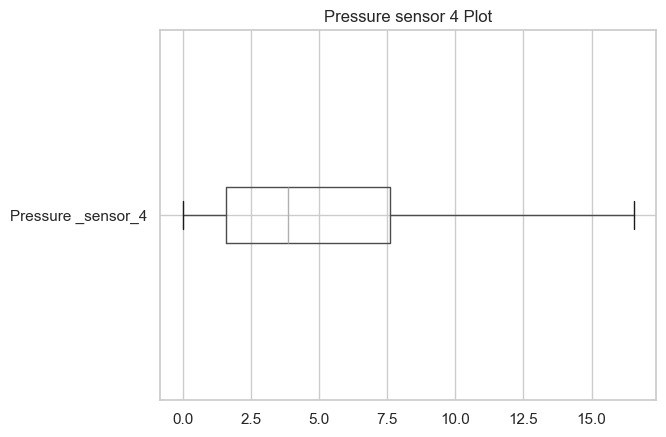

In [78]:
# Pressure Sensor 4 Box Plot
pressure_sensor_4_pd = df.select('Pressure _sensor_4').toPandas()

pressure_sensor_4_pd.boxplot(column='Pressure _sensor_4', vert=False)
plt.title('Pressure sensor 4 Plot')
plt.show()

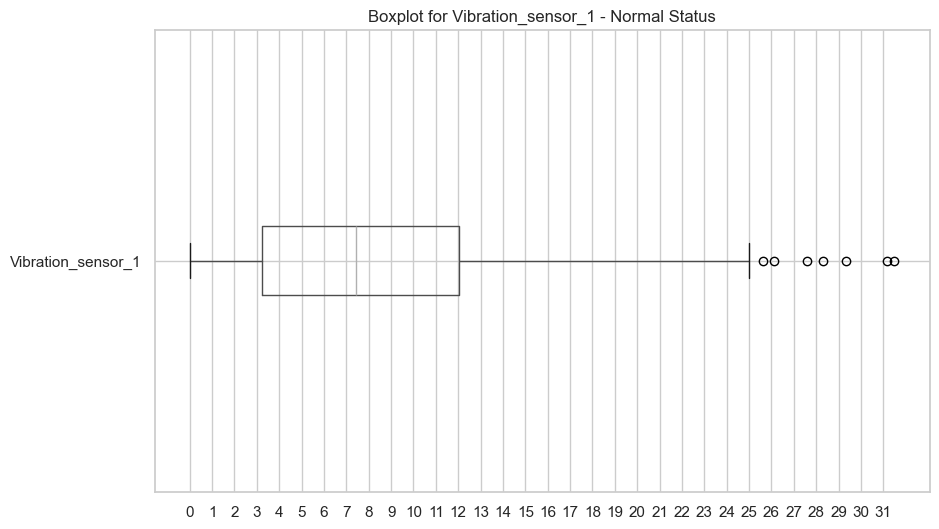

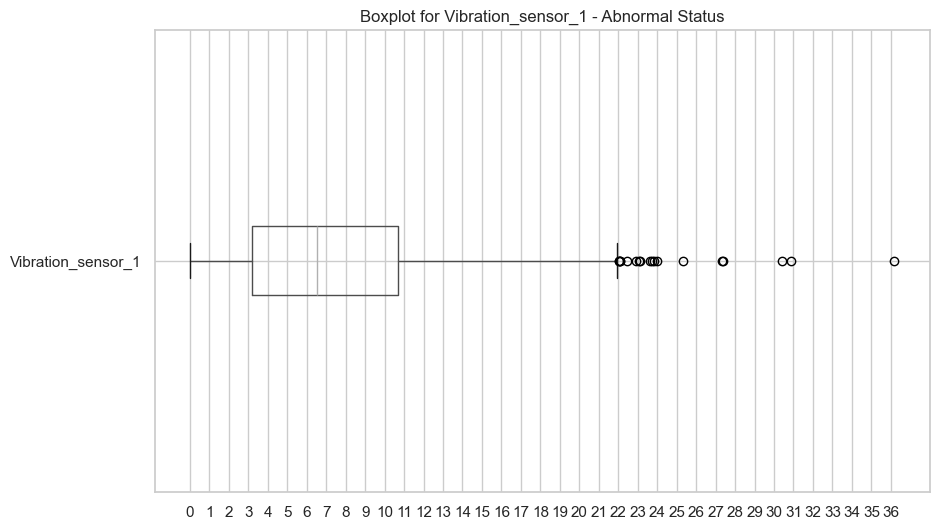

In [85]:
# Vibration Sensor 1 Box Plot

vibration_sensor_1_column = df.select('Vibration_sensor_1', 'Status')

vibration_sensor_1_normal = vibration_sensor_1_column.filter(col('Status') == 'Normal').toPandas()

vibration_sensor_1_abnormal = vibration_sensor_1_column.filter(col('Status') == 'Abnormal').toPandas()

# normal
plt.figure(figsize=(10, 6))
vibration_sensor_1_normal.boxplot(column='Vibration_sensor_1', vert=False)
plt.title('Boxplot for Vibration_sensor_1 - Normal Status')
plt.xticks(range(int(vibration_sensor_1_normal['Vibration_sensor_1'].min()), int(vibration_sensor_1_normal['Vibration_sensor_1'].max()) + 1, 1))
plt.show()

# abnormal
plt.figure(figsize=(10, 6))
vibration_sensor_1_abnormal.boxplot(column='Vibration_sensor_1', vert=False)
plt.title('Boxplot for Vibration_sensor_1 - Abnormal Status')
plt.xticks(range(int(vibration_sensor_1_abnormal['Vibration_sensor_1'].min()), int(vibration_sensor_1_abnormal['Vibration_sensor_1'].max()) + 1, 1))
plt.show()

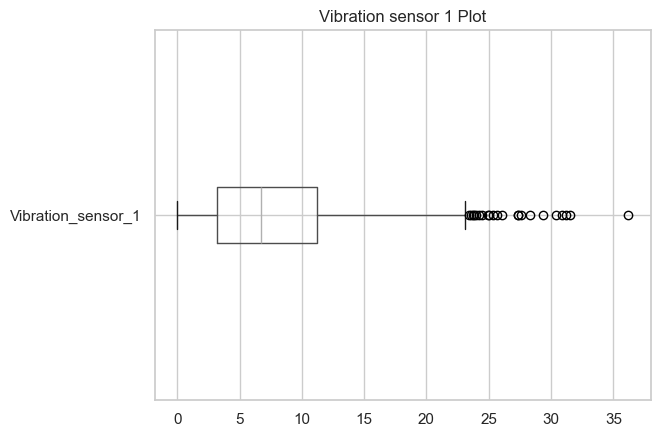

In [79]:
# Vibration Sensor 1 Box Plot
vibration_sensor_1_pd = df.select('Vibration_sensor_1').toPandas()

vibration_sensor_1_pd.boxplot(column='Vibration_sensor_1', vert=False)
plt.title('Vibration sensor 1 Plot')
plt.show()

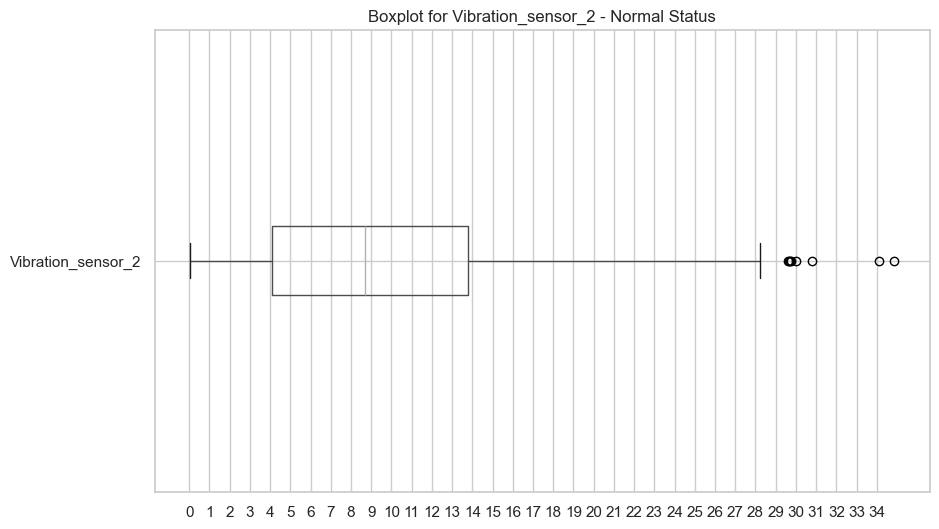

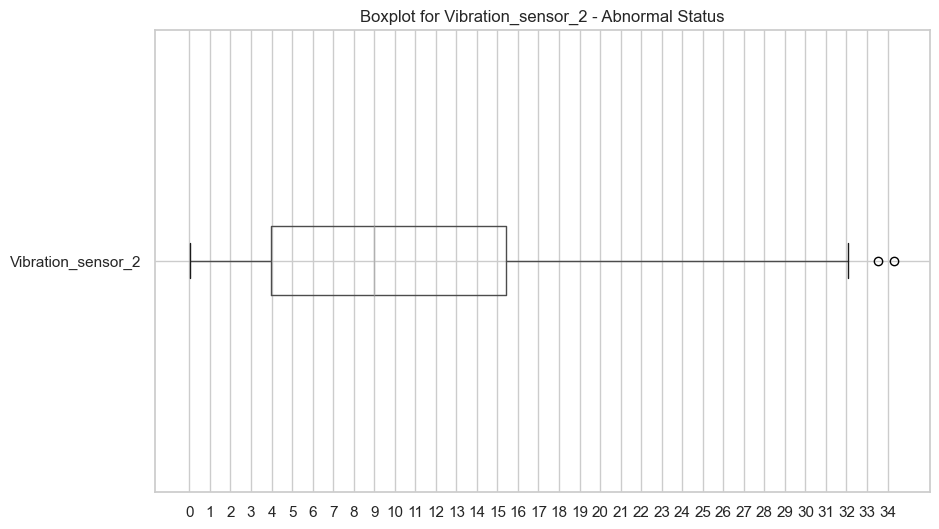

In [86]:
# Vibration Sensor 2 Box Plot

vibration_sensor_2_column = df.select('Vibration_sensor_2', 'Status')

vibration_sensor_2_normal = vibration_sensor_2_column.filter(col('Status') == 'Normal').toPandas()

vibration_sensor_2_abnormal = vibration_sensor_2_column.filter(col('Status') == 'Abnormal').toPandas()

# normal
plt.figure(figsize=(10, 6))
vibration_sensor_2_normal.boxplot(column='Vibration_sensor_2', vert=False)
plt.title('Boxplot for Vibration_sensor_2 - Normal Status')
plt.xticks(range(int(vibration_sensor_2_normal['Vibration_sensor_2'].min()), int(vibration_sensor_2_normal['Vibration_sensor_2'].max()) + 1, 1))
plt.show()

# abnormal
plt.figure(figsize=(10, 6))
vibration_sensor_2_abnormal.boxplot(column='Vibration_sensor_2', vert=False)
plt.title('Boxplot for Vibration_sensor_2 - Abnormal Status')
plt.xticks(range(int(vibration_sensor_2_abnormal['Vibration_sensor_2'].min()), int(vibration_sensor_2_abnormal['Vibration_sensor_2'].max()) + 1, 1))
plt.show()

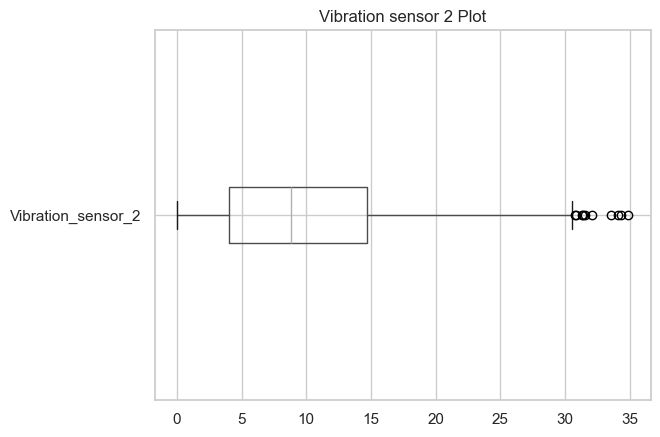

In [80]:
# Vibration Sensor 2 Box Plot
vibration_sensor_2_pd = df.select('Vibration_sensor_2').toPandas()

vibration_sensor_2_pd.boxplot(column='Vibration_sensor_2', vert=False)
plt.title('Vibration sensor 2 Plot')
plt.show()

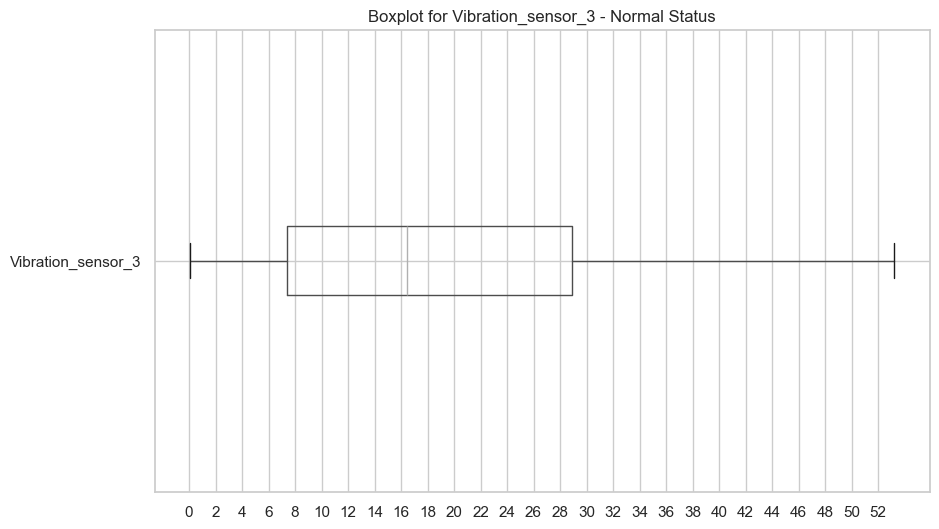

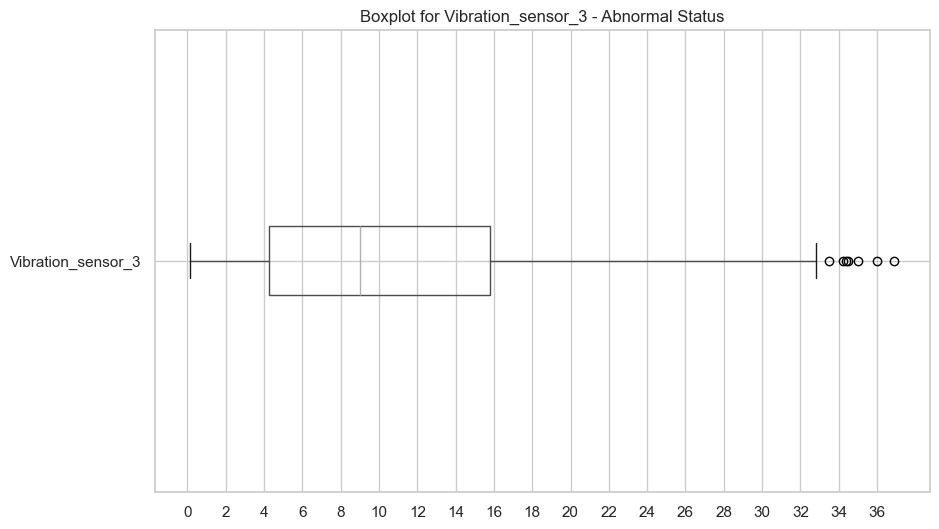

In [88]:
# Vibration Sensor 3 Box Plot

vibration_sensor_3_column = df.select('Vibration_sensor_3', 'Status')

vibration_sensor_3_normal = vibration_sensor_3_column.filter(col('Status') == 'Normal').toPandas()

vibration_sensor_3_abnormal = vibration_sensor_3_column.filter(col('Status') == 'Abnormal').toPandas()

# normal
plt.figure(figsize=(10, 6))
vibration_sensor_3_normal.boxplot(column='Vibration_sensor_3', vert=False)
plt.title('Boxplot for Vibration_sensor_3 - Normal Status')
plt.xticks(range(int(vibration_sensor_3_normal['Vibration_sensor_3'].min()), int(vibration_sensor_3_normal['Vibration_sensor_3'].max()) + 1, 2))
plt.show()

# Plot boxplot for the abnormal group
plt.figure(figsize=(10, 6))
vibration_sensor_3_abnormal.boxplot(column='Vibration_sensor_3', vert=False)
plt.title('Boxplot for Vibration_sensor_3 - Abnormal Status')
plt.xticks(range(int(vibration_sensor_3_abnormal['Vibration_sensor_3'].min()), int(vibration_sensor_3_abnormal['Vibration_sensor_3'].max()) + 1, 2))
plt.show()

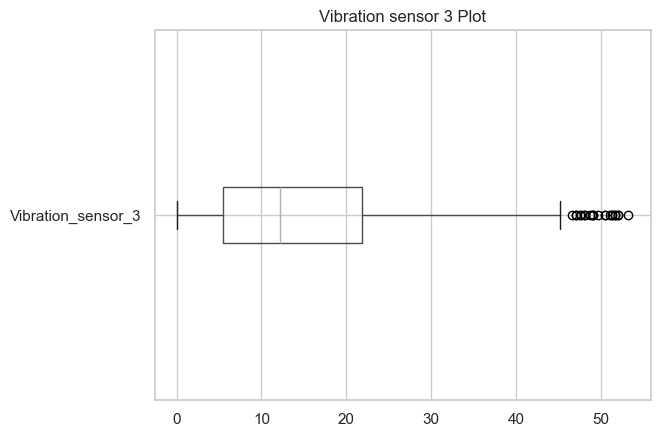

In [82]:
# Vibration Sensor 3 Box Plot
vibration_sensor_3_pd = df.select('Vibration_sensor_3').toPandas()

vibration_sensor_3_pd.boxplot(column='Vibration_sensor_3', vert=False)
plt.title('Vibration sensor 3 Plot')
plt.show()

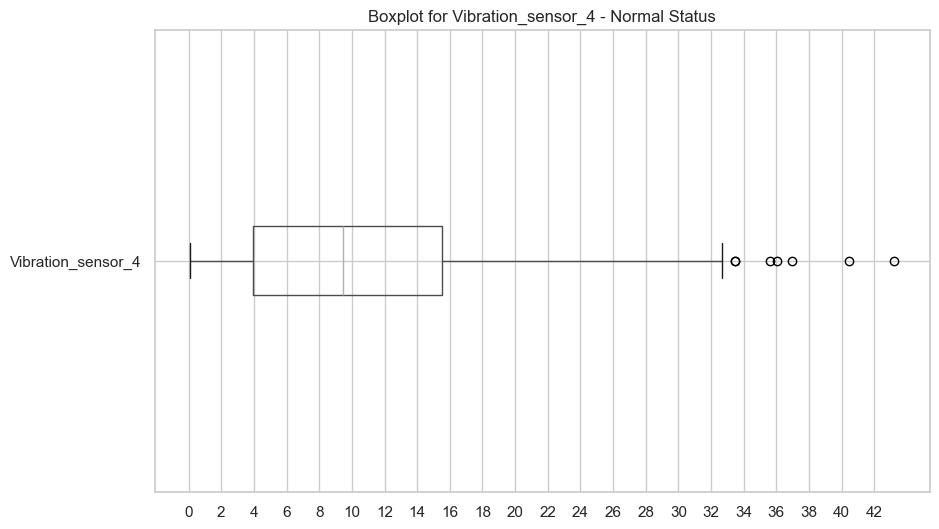

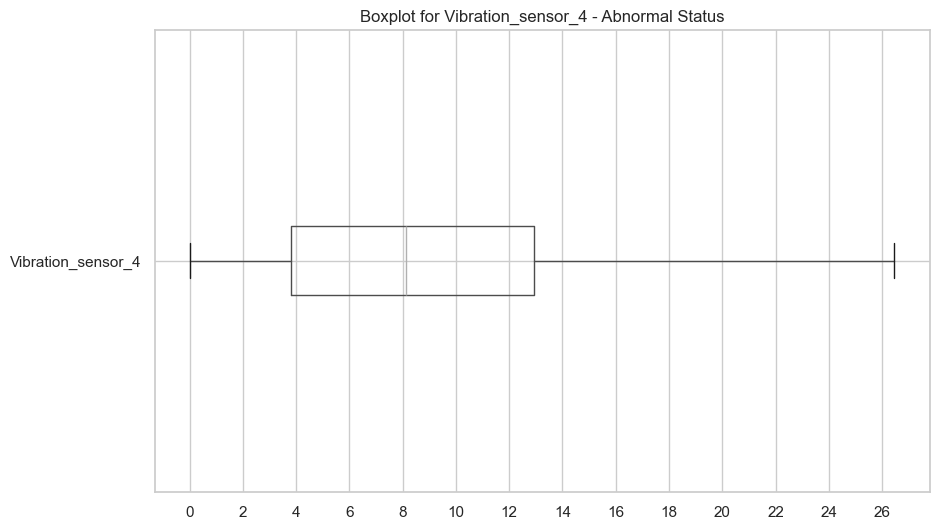

In [90]:
# Vibration Sensor 1 Box Plot
# Extract the relevant column for Power_Range_sensor_2
vibration_sensor_4_column = df.select('Vibration_sensor_4', 'Status')

# Select the Normal rows
vibration_sensor_4_normal = vibration_sensor_4_column.filter(col('Status') == 'Normal').toPandas()

# Select the Abnormal rows
vibration_sensor_4_abnormal = vibration_sensor_4_column.filter(col('Status') == 'Abnormal').toPandas()

# Plot boxplot for the normal group
plt.figure(figsize=(10, 6))
vibration_sensor_4_normal.boxplot(column='Vibration_sensor_4', vert=False)
plt.title('Boxplot for Vibration_sensor_4 - Normal Status')
plt.xticks(range(int(vibration_sensor_4_normal['Vibration_sensor_4'].min()), int(vibration_sensor_4_normal['Vibration_sensor_4'].max()) + 1, 2))
plt.show()

# Plot boxplot for the abnormal group
plt.figure(figsize=(10, 6))
vibration_sensor_4_abnormal.boxplot(column='Vibration_sensor_4', vert=False)
plt.title('Boxplot for Vibration_sensor_4 - Abnormal Status')
plt.xticks(range(int(vibration_sensor_4_abnormal['Vibration_sensor_4'].min()), int(vibration_sensor_4_abnormal['Vibration_sensor_4'].max()) + 1, 2))
plt.show()

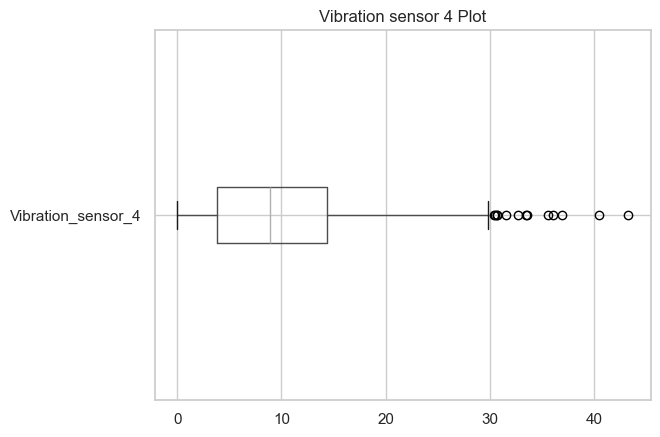

In [83]:
# Vibration Sensor 4 Box Plot
vibration_sensor_4_pd = df.select('Vibration_sensor_4').toPandas()

vibration_sensor_4_pd.boxplot(column='Vibration_sensor_4', vert=False)
plt.title('Vibration sensor 4 Plot')
plt.show()

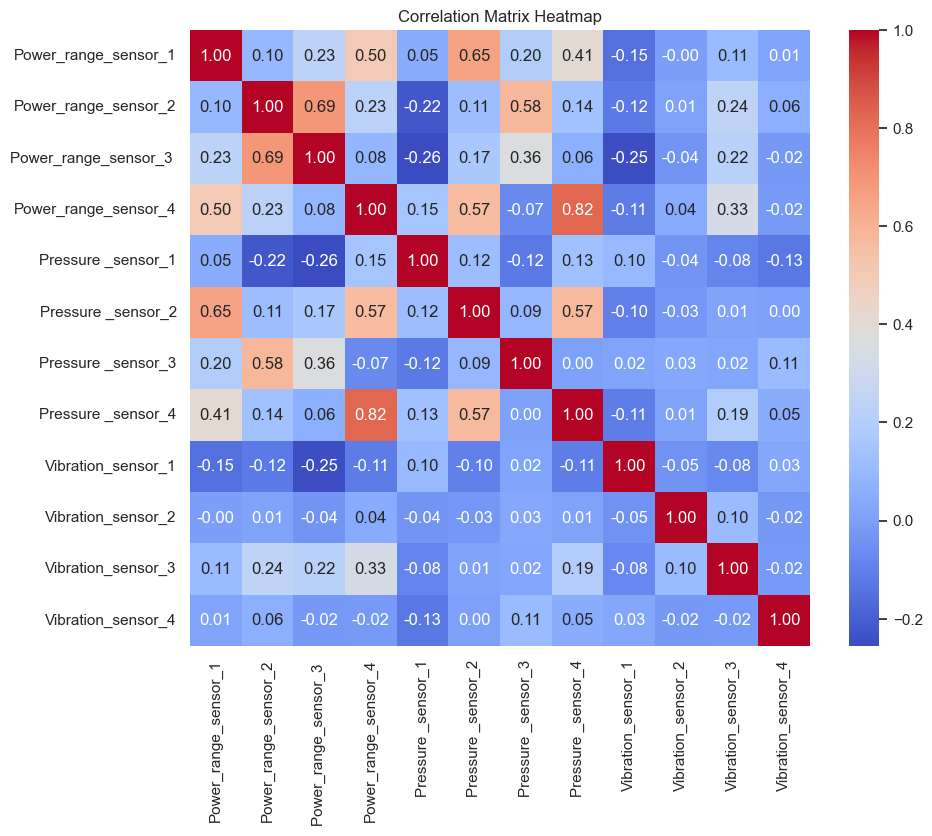

In [91]:
# 3. 
# Code modified from https://stackoverflow.com/questions/37618977/pyspark-computing-correlation
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd


# Correlation Matrix using seaborn for better visualisation

# Take list of numeric columns, excludes first column which is non-numeric (status)
numeric_columns = df.columns[1:]

# Convert the extracted numeric columns list to a vector
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_columns, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(df_vector, vector_col)

# Extract the correlation matrix by collecting it and convert to a Pandas DataFrame
correlation_matrix_array = correlation_matrix.collect()[0]["pearson({})".format(vector_col)].toArray()
correlation_matrix_df = pd.DataFrame(correlation_matrix_array, columns=numeric_columns, index=numeric_columns)

# Plot Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [56]:
# Non-Seabron display
# Display the correlation matrix
print(correlation_matrix_df)

#for i in numeric_columns:
#    print(i)

                       Power_range_sensor_1  Power_range_sensor_2  \
Power_range_sensor_1               1.000000              0.095235   
Power_range_sensor_2               0.095235              1.000000   
Power_range_sensor_3               0.229943              0.693818   
Power_range_sensor_4               0.499795              0.228438   
Pressure _sensor_1                 0.047805             -0.222160   
Pressure _sensor_2                 0.652081              0.112438   
Pressure _sensor_3                 0.199811              0.583086   
Pressure _sensor_4                 0.406382              0.136380   
Vibration_sensor_1                -0.152247             -0.119142   
Vibration_sensor_2                -0.003684              0.011013   
Vibration_sensor_3                 0.106583              0.243242   
Vibration_sensor_4                 0.014177              0.058244   

                       Power_range_sensor_3   Power_range_sensor_4  \
Power_range_sensor_1            

In [8]:
# End spark session
spark.stop()